# Read from a database to Pandas DataFrame

In this example we read the basketball data from an sqlite database to a dataframe.  A similar workflow can be used to read from any database to a dataframe. 

First import the modules we will need, *sqlite3* (a database connector), and *pandas*.

In [9]:
import sqlite3 
import pandas as pd

After connecting to the data base we can use Pandas to execute an SQL statement and place the result into a DataFrame.  Once data from the database is in a DataFrame the workflow follows a typical pandas workflow.

In [10]:
conn=sqlite3.connect("../../data/databases/mytest.db")
df=pd.read_sql("select * from nba",conn)
#help(pd.read_sql)
print df.shape
print df.columns
df.head()

(471, 30)
Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'T3P', u'A3P', u'M3P', u'T2P', u'A2P', u'M2P', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PTS'],
      dtype='object')


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3,Steven Adams,C,22,OKC,52,52,24.9,2.8,4.8,...,0.607,2.5,3.8,6.3,0.7,0.4,1.2,1.0,2.8,7.2
1,5,Alexis Ajinca,C,27,NOP,41,6,12.3,2.0,4.0,...,0.821,1.1,3.0,4.1,0.4,0.3,0.5,0.5,2.2,4.6
2,6,Cole Aldrich,C,27,LAC,31,2,11.5,2.1,3.9,...,0.661,1.1,2.7,3.8,0.9,0.6,0.7,0.9,2.2,5.4
3,13,Chris Andersen,C,37,MIA,7,1,5.1,0.6,1.4,...,0.750,0.4,0.9,1.3,0.4,0.1,0.4,0.3,0.6,1.9
4,21,Joel Anthony,C,33,DET,13,0,4.0,0.2,0.4,...,0.833,0.5,0.6,1.2,0.1,0.2,0.3,0.1,0.6,0.7


Here we plot a bar graph with multiple categories, so we can compare assists and total rebounds for each position.  Note that groupby, aggreate by mean, and plot are all done in one line by chaining method calls. 

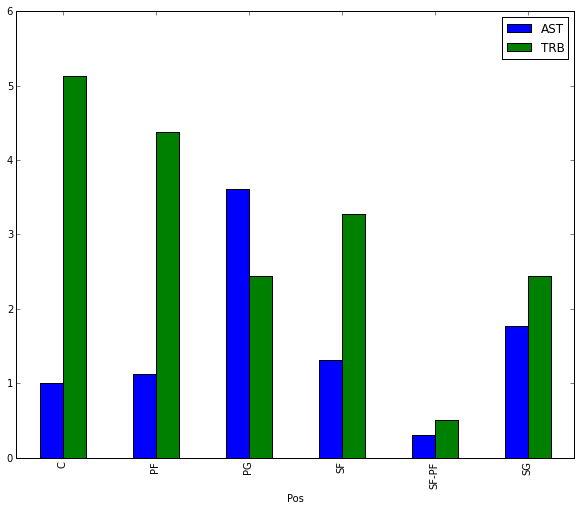

In [12]:
%matplotlib inline
df.groupby('Pos').mean()[['AST','TRB']].plot.bar(figsize=(10,8))